In [1]:
%%capture
%run full_data.ipynb

In [2]:
import sys 
sys.path.append('..')
import portfolios as p

Assigned portfolios formed by function "p.form_portfolios(...)"

In [3]:
assigned_data_5 = pd.read_csv('assigned_data_5_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_10 = pd.read_csv('assigned_data_10_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_20 = pd.read_csv('assigned_data_20_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')
assigned_data_50 = pd.read_csv('assigned_data_50_LRET_1_filtered_1st_decile_out_fsample_NEW.csv')

## Strategy plots

In [4]:
rets_5 = p.portfolios_returns_mean_table(assigned_data_5,'LRET_1',5)
rets_10 = p.portfolios_returns_mean_table(assigned_data_10,'LRET_1',10)
rets_20 = p.portfolios_returns_mean_table(assigned_data_20,'LRET_1',20)
rets_50 = p.portfolios_returns_mean_table(assigned_data_50,'LRET_1',50)

../portfolios.py:176: RuntimeWarning: Mean of empty slice.
  returns[i] = p_data[ret].values.mean()
/home/jaakko/.local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Constructing invesment universe mean return

In [5]:
assigned_data_5['PORT_MEAN'] = 1
mean_ret = p.compute_strategy_returns(assigned_data_5,'PORT_MEAN',1)

Portfolios' return time serieses for the study sample 1999/01-2019/12

In [6]:
rets_5_plot = rets_5[10:].sort_index()
rets_10_plot = rets_10[10:].sort_index()
rets_20_plot = rets_20[10:].sort_index()
rets_50_plot = rets_50[10:].sort_index()
mean_ret_plot = mean_ret[10:].sort_index()

In [7]:
rets_5_plot # How these look

,1,2,3,4,5
date,,,,,
199901,0.119144,0.050308,0.017913,0.022119,0.040876
199902,-0.053668,-0.045246,-0.052105,-0.056404,-0.075074
199903,-0.000959,-0.012461,-0.018788,-0.013829,-0.001061
199904,0.120093,0.084754,0.055613,0.062554,0.107511
199905,0.052975,0.034324,0.036266,0.020559,0.012103
...,...,...,...,...,...
201908,-0.068201,-0.061177,-0.038313,-0.047176,-0.039435
201909,0.047642,0.050004,0.031183,0.016623,-0.013142
201910,0.004361,0.002702,0.017917,0.015207,0.001150


5-Quantile mean-reversion portfolios plot

In [8]:
rets_5_plot.columns = ['Losers',2,3,4,'Winners']
rets_5_plot['Universe ew'] = mean_ret_plot['RET'].values

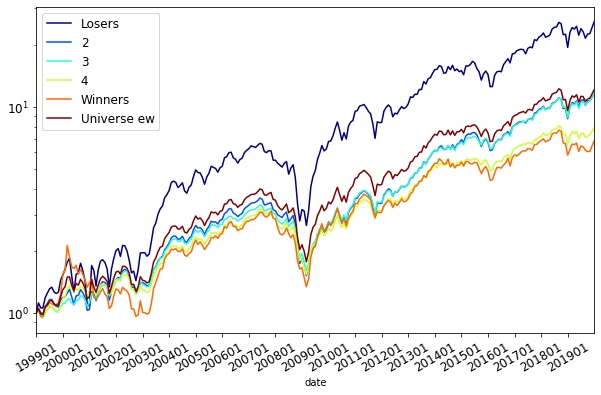

In [9]:
import matplotlib.pyplot as plt

p.plot_cumulative(rets_5_plot,log_scale=True)
plt.legend(loc='best', fontsize=12)

plt.xticks(range(0,252,12), rets_5_plot.index[::12],rotation=30)
plt.show()

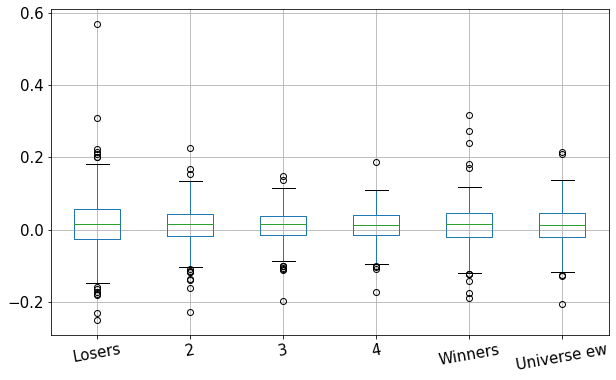

In [10]:
rets_5_plot.boxplot(fontsize=15,rot=10,figsize=(10,6))

In [11]:
plot_losers = pd.DataFrame()
plot_losers['50-Q Losers'] = rets_50_plot[1].values
plot_losers['20-Q Losers'] = rets_20_plot[1].values
plot_losers['10-Q Losers'] = rets_10_plot[1].values
plot_losers['5-Q Losers'] = rets_5_plot['Losers'].values
plot_losers['Universe ew'] = mean_ret_plot['RET'].values

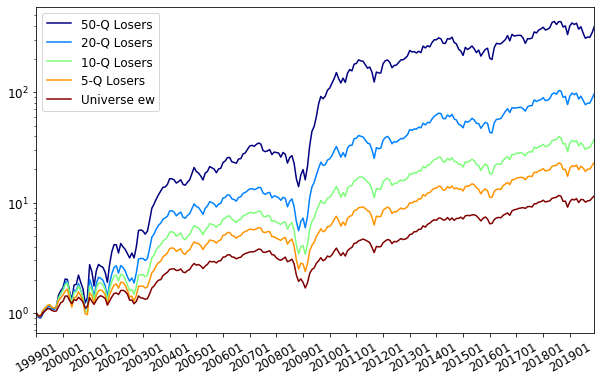

In [12]:
p.plot_cumulative(plot_losers,log_scale=True)

plt.legend(loc='best', fontsize=12)

plt.xticks(range(0,252,12), rets_5_plot.index[::12],rotation=30)
plt.show()

## Losers-Winners table

In [13]:
losers_winner = plot_losers
losers_winner['50-Q Winners'] = rets_50_plot[50].values
losers_winner['20-Q Winners'] = rets_50_plot[20].values
losers_winner['10-Q Winners'] = rets_50_plot[10].values
losers_winner = losers_winner[['50-Q Losers','20-Q Losers','10-Q Losers',
                               '50-Q Winners','20-Q Winners','10-Q Winners',
                               'Universe ew']]

In [14]:
loser_winner_summary = losers_winner.describe().transpose()

In [15]:
loser_winner_summary

,count,mean,std,min,25%,50%,75%,max
50-Q Losers,252.0,0.032856,0.135829,-0.272893,-0.037256,0.019306,0.092543,0.983819
20-Q Losers,252.0,0.025223,0.116772,-0.263992,-0.032727,0.017034,0.074940,0.804192
10-Q Losers,252.0,0.019964,0.102688,-0.264510,-0.029493,0.018141,0.066391,0.706843
50-Q Winners,252.0,0.014539,0.096972,-0.334659,-0.035125,0.013566,0.060000,0.451534
20-Q Winners,252.0,0.009786,0.053887,-0.231893,-0.018985,0.015434,0.041763,0.178431
10-Q Winners,252.0,0.013553,0.068151,-0.235304,-0.024689,0.017453,0.053837,0.351489
Universe ew,252.0,0.011562,0.056927,-0.205617,-0.020117,0.011912,0.046547,0.214010


In [16]:
p_5_pos = p.portfolios_size_summary(assigned_data_5,'LRET_1')
p_10_pos = p.portfolios_size_summary(assigned_data_10,'LRET_1')
p_20_pos = p.portfolios_size_summary(assigned_data_20,'LRET_1')
p_50_pos = p.portfolios_size_summary(assigned_data_50,'LRET_1')

In [17]:
pl_10_avg = round(p_10_pos[1].mean(),2)
pl_20_avg = round(p_20_pos[1].mean(),2)
pl_50_avg = round(p_50_pos[1].mean(),2)
pw_10_avg = round(p_10_pos[10].mean(),2)
pw_20_avg = round(p_20_pos[20].mean(),2)
pw_50_avg = round(p_50_pos[50].mean(),2)

In [18]:
loser_winner_summary['Avg #'] = [pl_50_avg,pl_20_avg,pl_10_avg,
                                 pw_50_avg,pw_20_avg,pw_10_avg,
                                 '-']

In [19]:
loser_winner_summary['count'] = loser_winner_summary['count'].astype(int)
loser_winner_summary[['mean','std','min','25%','50%','75%','max']] =  (loser_winner_summary[['mean','std','min','25%','50%','75%','max']]*100).round(2)

In [20]:
loser_winner_summary

,count,mean,std,min,25%,50%,75%,max,Avg #
50-Q Losers,252,3.29,13.58,-27.29,-3.73,1.93,9.25,98.38,78.56
20-Q Losers,252,2.52,11.68,-26.40,-3.27,1.70,7.49,80.42,195.79
10-Q Losers,252,2.00,10.27,-26.45,-2.95,1.81,6.64,70.68,390.94
50-Q Winners,252,1.45,9.70,-33.47,-3.51,1.36,6.00,45.15,78.61
20-Q Winners,252,0.98,5.39,-23.19,-1.90,1.54,4.18,17.84,195.92
10-Q Winners,252,1.36,6.82,-23.53,-2.47,1.75,5.38,35.15,391.27
Universe ew,252,1.16,5.69,-20.56,-2.01,1.19,4.65,21.40,-


In [21]:
print(loser_winner_summary.to_latex())

\begin{tabular}{lrrrrrrrrl}
\toprule
{} &  count &  mean &    std &    min &   25\% &   50\% &   75\% &    max &   Avg \# \\
\midrule
50-Q Losers  &    252 &  3.29 &  13.58 & -27.29 & -3.73 &  1.93 &  9.25 &  98.38 &   78.56 \\
20-Q Losers  &    252 &  2.52 &  11.68 & -26.40 & -3.27 &  1.70 &  7.49 &  80.42 &  195.79 \\
10-Q Losers  &    252 &  2.00 &  10.27 & -26.45 & -2.95 &  1.81 &  6.64 &  70.68 &  390.94 \\
50-Q Winners &    252 &  1.45 &   9.70 & -33.47 & -3.51 &  1.36 &  6.00 &  45.15 &   78.61 \\
20-Q Winners &    252 &  0.98 &   5.39 & -23.19 & -1.90 &  1.54 &  4.18 &  17.84 &  195.92 \\
10-Q Winners &    252 &  1.36 &   6.82 & -23.53 & -2.47 &  1.75 &  5.38 &  35.15 &  391.27 \\
Universe ew  &    252 &  1.16 &   5.69 & -20.56 & -2.01 &  1.19 &  4.65 &  21.40 &       - \\
\bottomrule
\end{tabular}

